<a href="https://colab.research.google.com/github/Tikakiku/MachineLearningTasks/blob/main/Tugas2/PolynomialRegressionBMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Ganti path sesuai dengan lokasi dataset CSV di Google Drive Anda
file_path = '/content/drive/MyDrive/DatasetBMI/diabetes-dataset.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dataset
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  


In [3]:
df.head(17)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

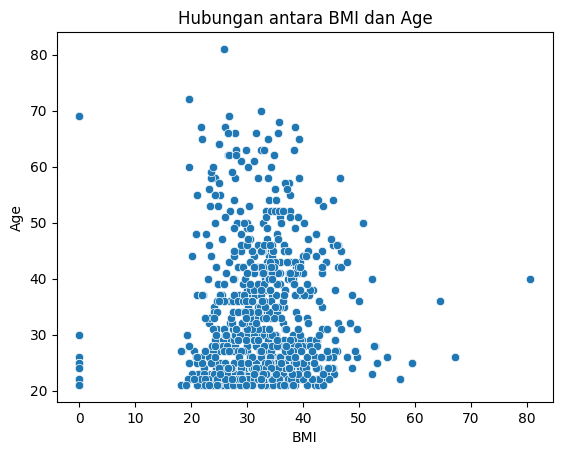

In [10]:
# Membuat scatter plot
sns.scatterplot(data=df, x="BMI", y="Age")

# Memberikan judul dan label sumbu
plt.title("Hubungan antara BMI dan Age")
plt.xlabel("BMI")
plt.ylabel("Age")

# Menampilkan plot
plt.show()

In [11]:
# Kolom label (variabel dependen)
x = df["BMI"]

# Kolom target (variabel independen)
y = df["Age"]

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

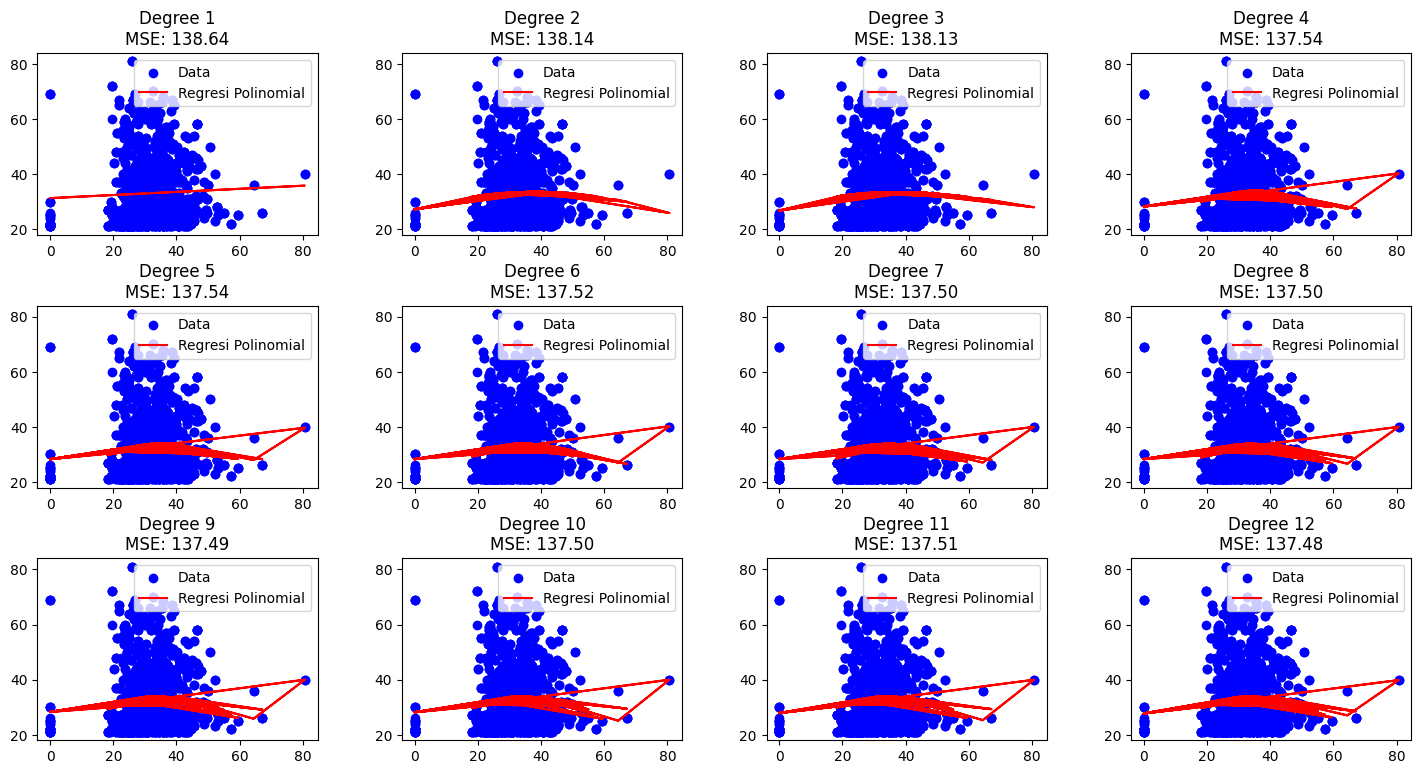

Degree 1: MSE = 138.64
Degree 2: MSE = 138.14
Degree 3: MSE = 138.13
Degree 4: MSE = 137.54
Degree 5: MSE = 137.54
Degree 6: MSE = 137.52
Degree 7: MSE = 137.50
Degree 8: MSE = 137.50
Degree 9: MSE = 137.49
Degree 10: MSE = 137.50
Degree 11: MSE = 137.51
Degree 12: MSE = 137.48


In [13]:
# Menginisialisasi array derajat polinomial yang akan diuji
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Membagi jendela gambar menjadi 2x4 subplot
fig, axes = plt.subplots(3, 4, figsize=(15, 8))
fig.tight_layout(pad=3.0)

# Menginisialisasi variabel untuk menyimpan nilai-nilai MSE
mse_values = []

for i, degree in enumerate(degrees):
    # Membuat objek PolynomialFeatures dengan derajat tertentu
    polynomial_features = PolynomialFeatures(degree=degree)

    # Mengubah fitur independen 'x' menjadi bentuk polinomial
    x_poly = polynomial_features.fit_transform(x.values.reshape(-1, 1))

    # Melatih model regresi linier pada fitur polinomial
    model = LinearRegression()
    model.fit(x_poly, y)

    # Memprediksi hasil
    y_pred = model.predict(x_poly)

    # Menghitung MSE (Mean Squared Error)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot hasil regresi polinomial
    ax = axes[i // 4, i % 4]
    ax.scatter(x, y, label='Data', color='blue')
    ax.plot(x, y_pred, color='red', label='Regresi Polinomial')
    ax.set_title(f'Degree {degree}\nMSE: {mse:.2f}')
    ax.legend()

# Menampilkan plot
plt.show()

# Menampilkan MSE untuk setiap derajat
for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')